**Data Understanding**

In [13]:
import pandas as pd

# Loading the dataset
file_path = "day.csv"
df = pd.read_csv(file_path)

# Exploring the dataset
print("Dataset Overview:")
print(df.head())  # Displaying the first few rows of the dataset

print("\nDataset Information:")
print(df.info())  # Displaying information about the dataset, including data types and non-null counts

print("\nDescriptive Statistics:")
print(df.describe())  # Displaying descriptive statistics for numerical columns

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Checking data types
data_types = df.dtypes
print("\nData Types:")
print(data_types)


Dataset Overview:
      starttime       endtime  user  day  week  isweekday  isweekend  role  \
0  1.262371e+09  1.262457e+09    10    5     0          0          1    39   
1  1.262371e+09  1.262457e+09    12    5     0          0          1    39   
2  1.262371e+09  1.262457e+09    59    5     0          0          1    39   
3  1.262371e+09  1.262457e+09    95    5     0          0          1    39   
4  1.262371e+09  1.262457e+09   123    5     0          0          1    39   

   b_unit  f_unit  ...  afterhourhttp_n_hackf  \
0       0       4  ...                      0   
1       0       4  ...                      0   
2       0       4  ...                      0   
3       0       4  ...                      0   
4       0       4  ...                      0   

   afterhourhttp_hackf_mean_url_len  afterhourhttp_hackf_mean_url_depth  \
0                                 0                                   0   
1                                 0                                 

**Data Preprocessing**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Loading the dataset
file_path = "day.csv"
df = pd.read_csv(file_path)

# Handling Missing Values
df.fillna(0, inplace=True)  # Replacing NaN values with 0;

# Encodeing Categorical Variables
categorical_cols = ['role', 'b_unit', 'f_unit', 'dept', 'team']
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scaling Numerical Features
numerical_cols = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Splitting the dataset into training and testing sets
# Assuming 'insider' is the target variable

X = df.drop('insider', axis=1)
y = df['insider']

# Adjusting test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (264361, 507) (264361,)
Testing set shape: (66091, 507) (66091,)


**Evaluating the Model**

Accuracy: 0.9987895477447761

Confusion Matrix:
 [[65915     0     0     0]
 [    2    13     0     0]
 [   77     0    80     0]
 [    1     0     0     3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     65915
           1       1.00      0.87      0.93        15
           2       1.00      0.51      0.68       157
           3       1.00      0.75      0.86         4

    accuracy                           1.00     66091
   macro avg       1.00      0.78      0.87     66091
weighted avg       1.00      1.00      1.00     66091



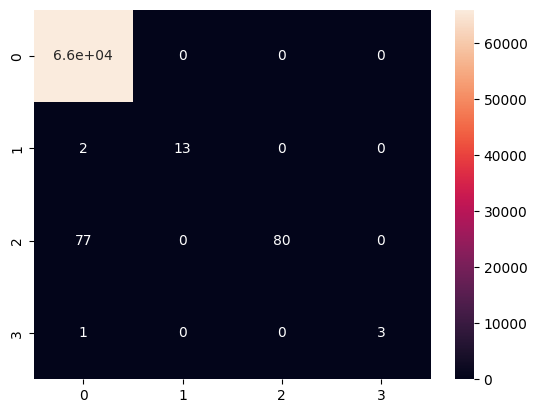

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset
file_path = "day.csv"
df = pd.read_csv(file_path)


# Train-Test Split
# Assuming 'insider' is the target variable
X = df.drop('insider', axis=1)
y = df['insider']

# Adjusting test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred, normalize=False)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)
class_report = classification_report(y_test, y_pred)

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


First few rows of the dataset:
      starttime       endtime  user  day  week  isweekday  isweekend  role  \
0  1.262371e+09  1.262457e+09    10    5     0          0          1    39   
1  1.262371e+09  1.262457e+09    12    5     0          0          1    39   
2  1.262371e+09  1.262457e+09    59    5     0          0          1    39   
3  1.262371e+09  1.262457e+09    95    5     0          0          1    39   
4  1.262371e+09  1.262457e+09   123    5     0          0          1    39   

   b_unit  f_unit  ...  afterhourhttp_n_hackf  \
0       0       4  ...                      0   
1       0       4  ...                      0   
2       0       4  ...                      0   
3       0       4  ...                      0   
4       0       4  ...                      0   

   afterhourhttp_hackf_mean_url_len  afterhourhttp_hackf_mean_url_depth  \
0                                 0                                   0   
1                                 0                    

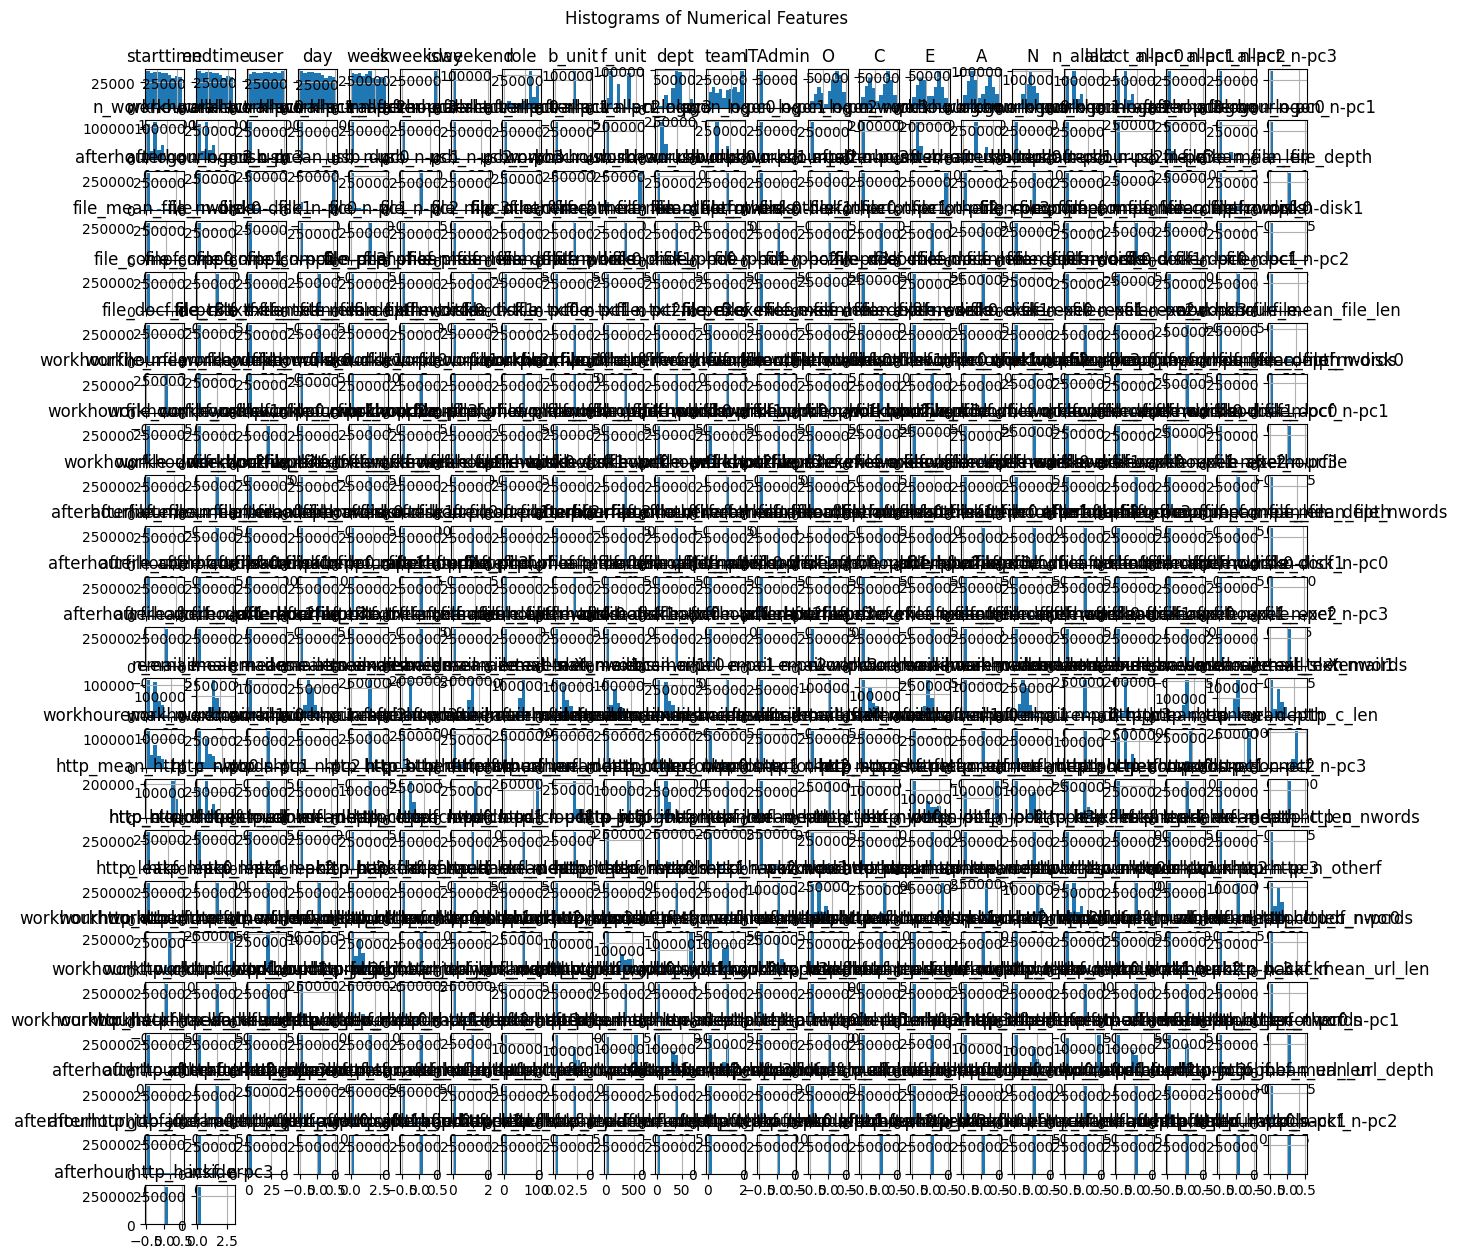

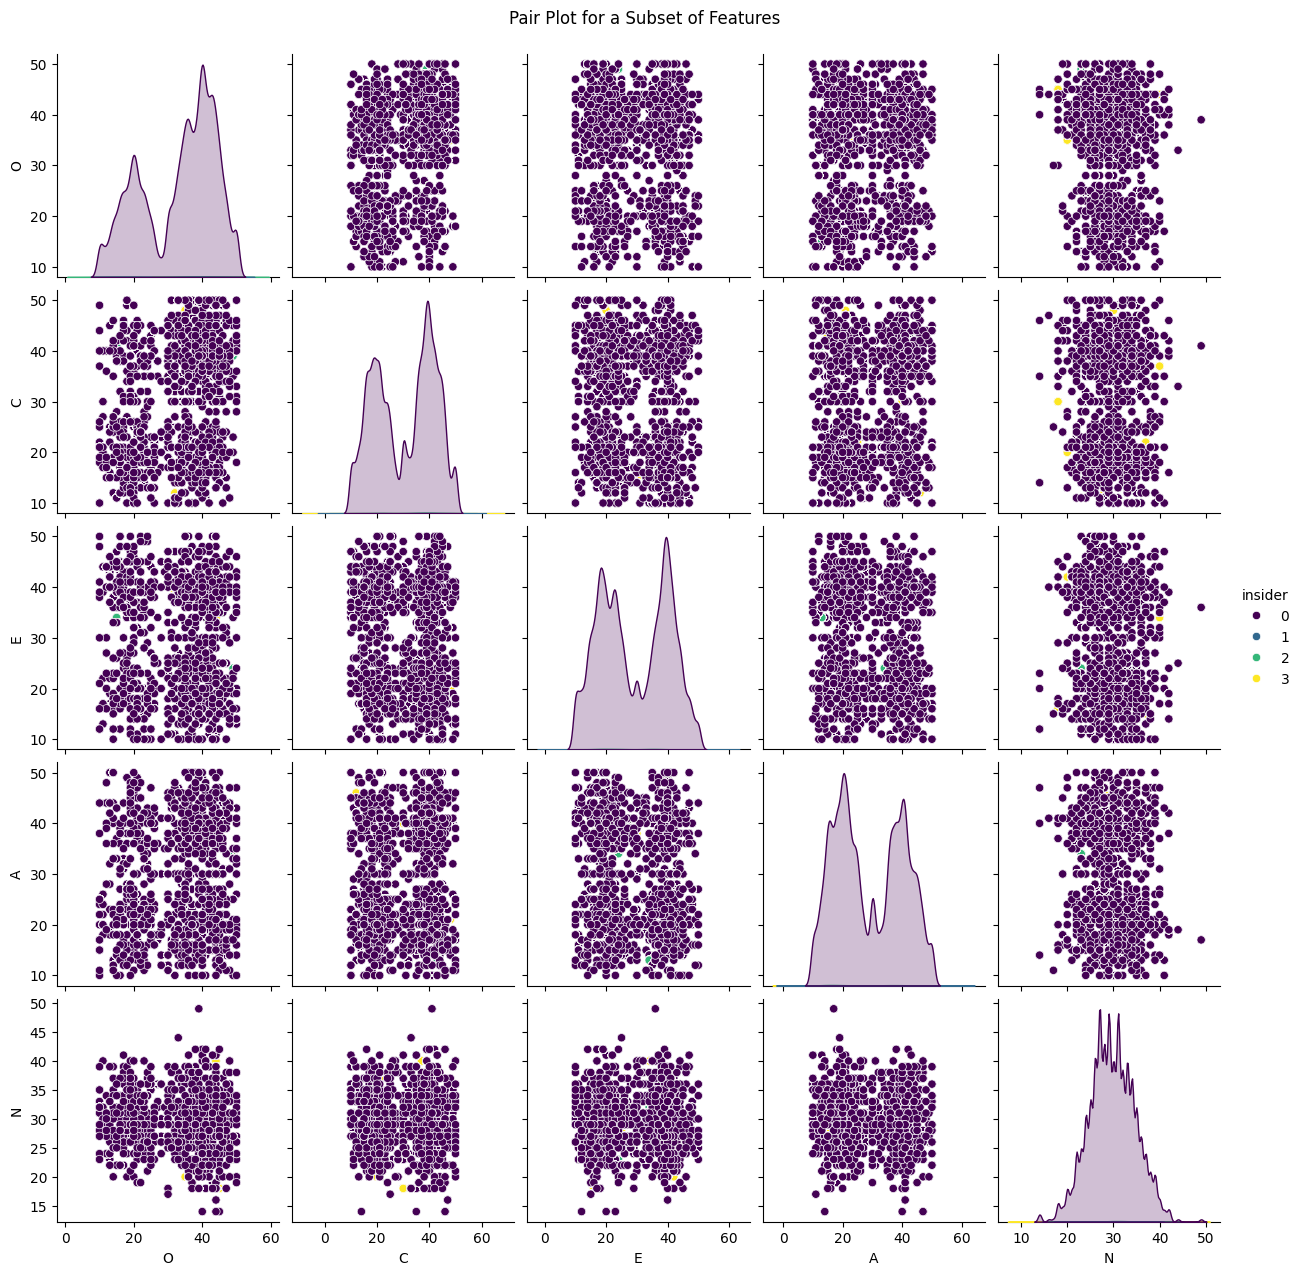

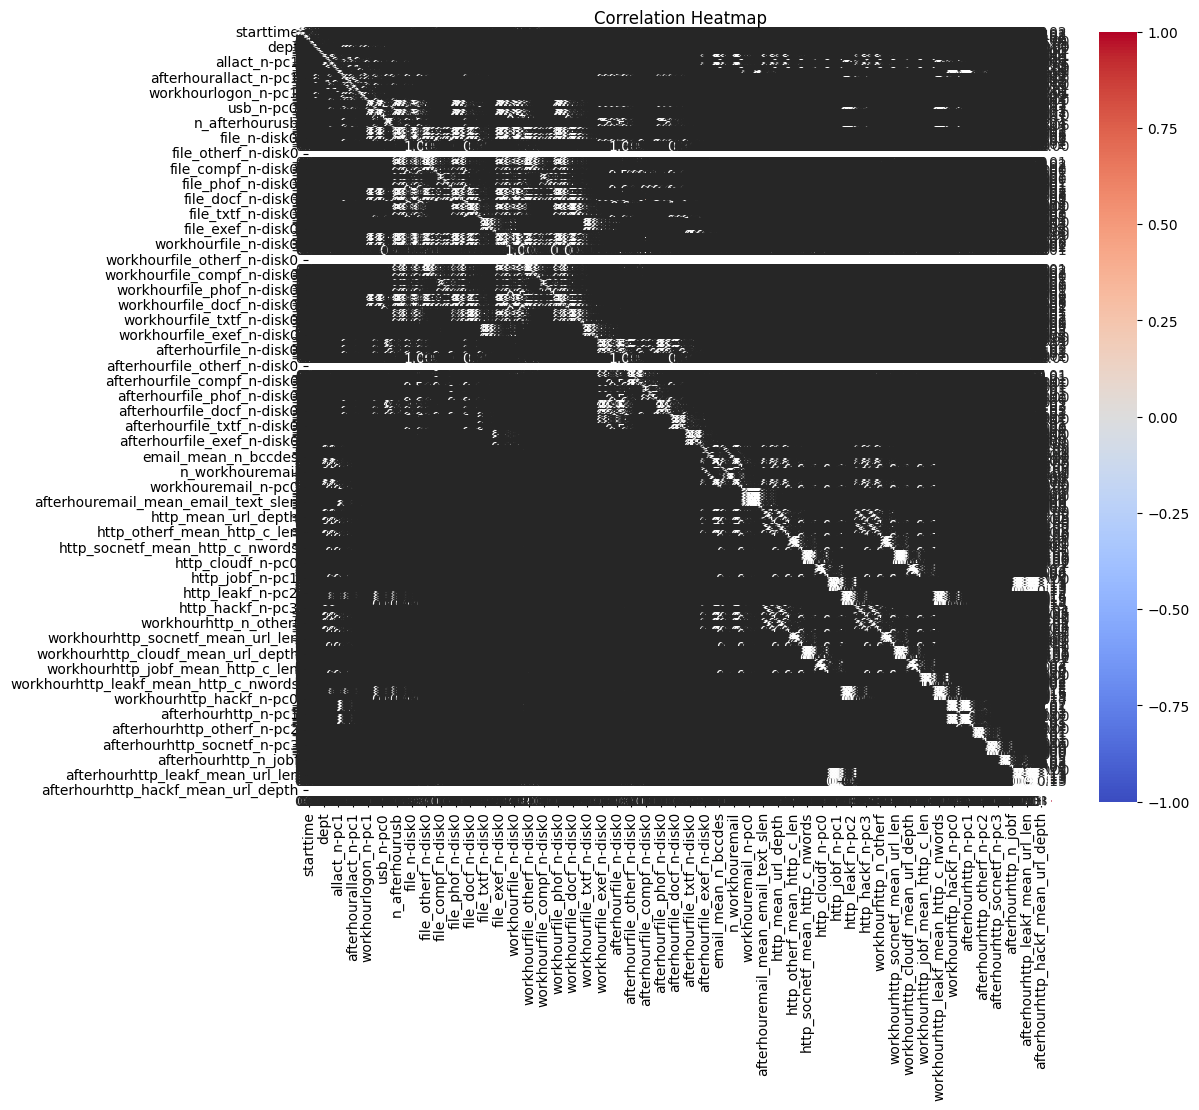

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = "day.csv"
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Histograms for Numerical Features
df.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numerical Features", y=0.92)
plt.show()

# Pair Plot for a Subset of Features
# (Adjust the 'vars' parameter based on your dataset size)
subset_features = ['O', 'C', 'E', 'A', 'N', 'insider']
sns.pairplot(df[subset_features], hue='insider', palette='viridis')
plt.suptitle("Pair Plot for a Subset of Features", y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Loading the dataset
file_path = "day.csv"
df = pd.read_csv(file_path)

# Assuming 'insider' is the target variable
target_variable = 'insider'

# Separating features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing a Random Forest classifier (you can use a different classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Saving the trained model to a file
model_filename = "trained_model_rf.pkl"
joblib.dump(rf_model, model_filename)
print(f"Trained model saved as {model_filename}")


Model Evaluation on Test Set:
Accuracy: 0.9988

Confusion Matrix:
[[65915     0     0     0]
 [    2    13     0     0]
 [   77     0    80     0]
 [    1     0     0     3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65915
           1       1.00      0.87      0.93        15
           2       1.00      0.51      0.68       157
           3       1.00      0.75      0.86         4

    accuracy                           1.00     66091
   macro avg       1.00      0.78      0.87     66091
weighted avg       1.00      1.00      1.00     66091

Trained model saved as trained_model_rf.pkl


In [19]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Loading the new dataset
new_data_file_path = "new_day.csv"
new_data = pd.read_csv(new_data_file_path)

# Loading the trained model
model_filename = "trained_model_rf.pkl"
trained_model = joblib.load(model_filename)

# Assuming 'insider' is the target variable
target_variable = 'insider'

# Separating features and target variable
X_new_data = new_data.drop(target_variable, axis=1)
y_new_data = new_data[target_variable]

# Makeing predictions using the trained model
y_pred = trained_model.predict(X_new_data)

# Evaluating the model
accuracy = accuracy_score(y_new_data, y_pred)
conf_matrix = confusion_matrix(y_new_data, y_pred)
classification_rep = classification_report(y_new_data, y_pred)

print("Model Evaluation on New Data:")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Evaluation on New Data:
Accuracy: 1.0000

Confusion Matrix:
[[9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [20]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Loading the new dataset
new_data_file_path = "new_day.csv"
new_data = pd.read_csv(new_data_file_path)

# Loading the trained model
model_filename = "trained_model_rf.pkl"
trained_model = joblib.load(model_filename)

# Assuming 'insider' is the target variable
target_variable = 'insider'

# Separating features and target variable
X_new_data = new_data.drop(target_variable, axis=1)
y_new_data = new_data[target_variable]

# Making predictions using the trained model
y_pred = trained_model.predict(X_new_data)

# Evaluating the model
accuracy = accuracy_score(y_new_data, y_pred)
conf_matrix = confusion_matrix(y_new_data, y_pred)
classification_rep = classification_report(y_new_data, y_pred)

print("Model Evaluation on New Data:")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Model Evaluation on New Data:
Accuracy: 1.0000

Confusion Matrix:
[[9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

